# Introduction-:

Sentiment analysis identifies the attitudes about a subject or message (e.g., a tweet). We can identify the sentiment in a text as positive, negative, or neutral.

Sentiment analysis has a wide range of applications in the real world, from reports on marketing campaigns, evaluation and catalog of user feedback, reviews, tweets, etc.

# Problem Statement-:
(Perform sentimental analysis on the Elon-musk tweets)

=In this data set we are going to perform an Sentiment analysis of Elon Musk Tweets. As you know his tweets are meaningful in aspect of market trend, evaluation on business strategy etc. To assume what is the sentiments in his tweets are a challenging task! 


In [34]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import spacy
from wordcloud import WordCloud, STOPWORDS
import re
from matplotlib.pyplot import imread
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
from string import punctuation
from nltk.stem.porter import *
stop_words = list(set(stopwords.words('english')))+list(punctuation)+['``', "'s", "...", "n't"]
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [82]:
Tweets_EM=pd.read_csv('C:\\Users\VivekG\\Desktop\\My Files- Vivek\\ExcelrThane\\DS\\Assignments\\Txt Mining\\Elon_musk.csv',encoding='latin1')
Tweets_EM.head()

,Sr.no,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


# EDA

In [83]:
# Dropping the Index(Sr.No.) Column
Tweets_EM=Tweets_EM.drop('Sr.no',axis=1)

In [26]:
# Rename the column
Tweets_EM=Tweets_EM.rename(columns={'Text':'Tweet'},inplace=False)
Tweets_EM.head()

,Tweet
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [17]:
Tweets_EM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [27]:
Tweets_EM.describe()

,Tweet
count,1999
unique,1997
top,The most entertaining outcome is the most likely
freq,2


In [28]:
Tweets_EM.isnull().sum()

Tweet    0
dtype: int64

# Data Exploration

In [29]:
# Number of Word in a single tweet.

Tweets_EM['word_count'] = Tweets_EM['Tweet'].apply(lambda x: len(str(x).split(" ")))
Tweets_EM[['Tweet','word_count']].head()

,Tweet,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [30]:
# Number of characters in a single tweet
Tweets_EM['char_count'] = Tweets_EM['Tweet'].str.len() ## this also includes spaces
Tweets_EM[['Tweet','char_count']].head()

,Tweet,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


In [80]:
# No of StopWords
SW = stopwords.words('english')

Tweets_EM['stopwords'] = Tweets_EM['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
Tweets_EM[['Tweet','stopwords']].head()

,Tweet,stopwords
0,im alien,0
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0
2,joerogan spotify great interview,0
3,doge underestimated,0
4,teslacn congratulation tesla china amazing exe...,0


In [36]:
# No of Special Characters
Tweets_EM['hastags'] = Tweets_EM['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
Tweets_EM[['Tweet','hastags']].head()

,Tweet,hastags
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1


In [37]:
# Count of Numerical characters in Tweet
Tweets_EM['numerics'] = Tweets_EM['Tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
Tweets_EM[['Tweet','numerics']].head()

,Tweet,numerics
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


# Text Preprocessing

Cleaning the text by removing irrelevant information

In [38]:

import re #regular expression
import string

def clean_text(text):
    
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

# Clean The Text
Tweets_EM["Tweet"] = Tweets_EM["Tweet"].apply(clean_text)
Tweets_EM.head()

,Tweet,word_count,char_count,hastags,numerics
0,im an alien,4,22,1,0
1,idaacarmack ray tracing on cyberpunk with hdr ...,13,82,1,0
2,joerogan spotify great interview,4,35,2,0
3,doge is underestimated,4,31,1,0
4,teslacn congratulations tesla china for amazin...,17,104,1,0


# Word frequency 

In [39]:

freq = pd.Series(' '.join(Tweets_EM['Tweet']).split()).value_counts()[:20] # for top 20
freq

the               486
to                400
a                 355
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
that              127
rt                127
but               126
dtype: int64

In [40]:
# Remove Punctuations

Tweets_EM['Tweet'] = Tweets_EM['Tweet'].str.replace('[^\w\s]','')
Tweets_EM['Tweet'].head()

0                                          im an alien
1    idaacarmack ray tracing on cyberpunk with hdr ...
2                     joerogan spotify great interview
3                               doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Tweet, dtype: object

In [41]:
# Removing stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
Tweets_EM['Tweet'] = Tweets_EM['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

Tweets_EM['Tweet'].head()

0                                             im alien
1    idaacarmack ray tracing cyberpunk hdr nextleve...
2                     joerogan spotify great interview
3                                  doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Tweet, dtype: object

In [42]:
# Word frequency after removal of stopwords

freq_SW = pd.Series(' '.join(Tweets_EM['Tweet']).split()).value_counts()[:20] # for top 20
freq_SW

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
haha                55
nasaspaceflight     55
good                51
launch              49
sure                43
yeah                41
cleantechnica       40
much                40
dtype: int64

In [43]:
# Removal of Common words

freq = pd.Series(' '.join(Tweets_EM['Tweet']).split()).value_counts()[:10]
freq

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
yes                86
great              76
teslaownerssv      73
dtype: int64

In [44]:
# Removal of Uncommon words

freq = pd.Series(' '.join(Tweets_EM['Tweet']).split()).value_counts()[-10:]
freq

accuracy    1
identify    1
proteins    1
sniffles    1
cough       1
fever       1
nyquil      1
musk        1
negati      1
altho       1
dtype: int64

In [45]:
# Spelling correction

Tweets_EM['Tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                             in alien
1    idaacarmack ray tracing cyberpunk her nextleve...
2                     joerogan specify great interview
3                                  done underestimated
4    teslacn congratulations tell china amazing exe...
Name: Tweet, dtype: object

In [46]:
# Frequency List

freq = list(freq.index)
Tweets_EM['Tweet'] = Tweets_EM['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
Tweets_EM['Tweet'].head()

0                                             im alien
1    idaacarmack ray tracing cyberpunk hdr nextleve...
2                     joerogan spotify great interview
3                                  doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Tweet, dtype: object

In [47]:
# Spell corrections

Tweets_EM['Tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                             in alien
1    idaacarmack ray tracing cyberpunk her nextleve...
2                     joerogan specify great interview
3                                  done underestimated
4    teslacn congratulations tell china amazing exe...
Name: Tweet, dtype: object

In [48]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VivekG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Tokenization

In [49]:

TextBlob(Tweets_EM['Tweet'][1]).words

WordList(['idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried'])

# Stemming

In [50]:
from nltk.stem import PorterStemmer
Stm = PorterStemmer()
Tweets_EM['Tweet'][:5].apply(lambda x: " ".join([Stm.stem(word) for word in x.split()]))

0                                             im alien
1    idaacarmack ray trace cyberpunk hdr nextlevel tri
2                     joerogan spotifi great interview
3                                      doge underestim
4    teslacn congratul tesla china amaz execut last...
Name: Tweet, dtype: object

In [290]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VivekG\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [291]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\VivekG\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Lemmatization

In [51]:
import nltk
from textblob import Word
Tweets_EM['Tweet'] = Tweets_EM['Tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
Tweets_EM['Tweet'].head()

0                                             im alien
1    idaacarmack ray tracing cyberpunk hdr nextleve...
2                     joerogan spotify great interview
3                                  doge underestimated
4    teslacn congratulation tesla china amazing exe...
Name: Tweet, dtype: object

# Word Frequency using count vectoriser



In [52]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(Tweets_EM["Tweet"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

#print(word_freq_df.sort('occurrences',ascending = False).head())

In [53]:
word_freq_df.head(20)

,term,occurrences,frequency
0,aber,1,0.000076
1,able,6,0.000455
2,abo,1,0.000076
3,aboard,1,0.000076
4,abort,3,0.000227
5,absence,1,0.000076
6,absolute,1,0.000076
7,absolutely,15,0.001137
8,absorb,1,0.000076
9,absorption,1,0.000076


# TFIDF 
(Term frequency inverse Document Frequency)

In [54]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(Tweets_EM["Tweet"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df


,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yahoofinance,yeah,year,yes,yesterday,youre,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.329704,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# N-grams

In [55]:
TextBlob(Tweets_EM['Tweet'][1]).ngrams(2)

[WordList(['idaacarmack', 'ray']),
 WordList(['ray', 'tracing']),
 WordList(['tracing', 'cyberpunk']),
 WordList(['cyberpunk', 'hdr']),
 WordList(['hdr', 'nextlevel']),
 WordList(['nextlevel', 'tried'])]

# Bi-gram

In [56]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [57]:

from nltk.corpus import stopwords
import nltk
from string import punctuation
from nltk.stem.porter import *
stop_words = list(set(stopwords.words('english')))+list(punctuation)+['``', "'s", "...", "n't"]


In [58]:
top2_words = get_top_n2_words(Tweets_EM["Tweet"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,rt spacex,71
1,spacex falcon,17
2,erdayastronaut spacex,16
3,crew dragon,13
4,pretty much,12


Plot the Bi-gram

[Text(0, 0, 'rt spacex'),
 Text(1, 0, 'spacex falcon'),
 Text(2, 0, 'erdayastronaut spacex'),
 Text(3, 0, 'crew dragon'),
 Text(4, 0, 'pretty much'),
 Text(5, 0, 'rt nasa'),
 Text(6, 0, 'falcon launch'),
 Text(7, 0, 'waemd spacex'),
 Text(8, 0, 'giga berlin'),
 Text(9, 0, 'nasa spacex')]

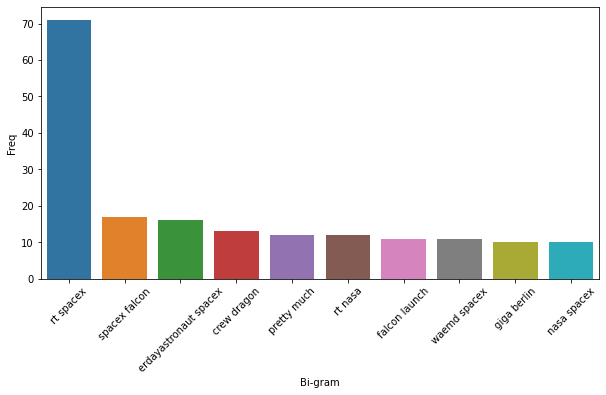

In [59]:
top10_bigram = top2_df.iloc[0:10,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top10_bigram["Bi-gram"],y=top10_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top10_bigram["Bi-gram"])

# Tri-gram

In [60]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [61]:
top3_words = get_top_n3_words(Tweets_EM["Tweet"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head()

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7


Plot the Tri-gram

[Text(0, 0, 'rt spacex falcon'),
 Text(1, 0, 'falcon first stage'),
 Text(2, 0, 'spacex falcon first'),
 Text(3, 0, 'thesheetztweetz waemd spacex'),
 Text(4, 0, 'course still love'),
 Text(5, 0, 'ppathole thesheetztweetz waemd'),
 Text(6, 0, 'waemd spacex spacexstarlink'),
 Text(7, 0, 'spacex falcon launch'),
 Text(8, 0, 'first stage landed'),
 Text(9, 0, 'rt spacex liftoff')]

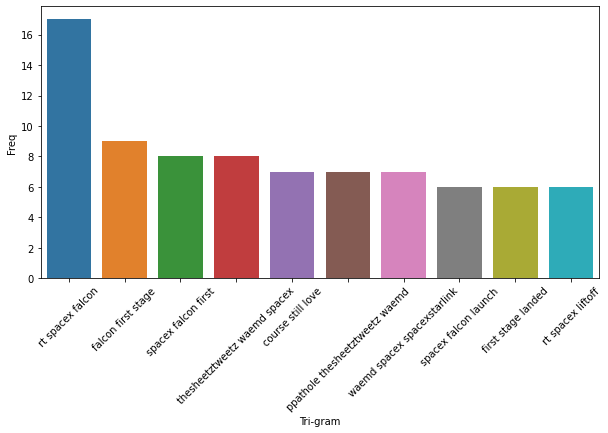

In [62]:
top10_trigram = top3_df.iloc[0:10,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top10_trigram["Tri-gram"],y=top10_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top10_trigram["Tri-gram"])

# WordCloud

In [63]:
string_Total = " ".join(Tweets_EM["Tweet"])

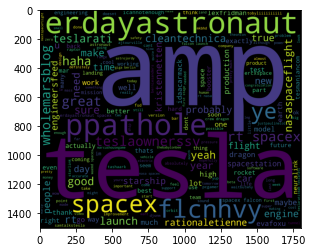

In [64]:
#wordcloud for entire corpus


wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

# Sentiment Analysis

In [65]:
Tweets_EM['Tweet'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                 (-0.25, 0.75)
1                                    (0.0, 0.0)
2                                   (0.8, 0.75)
3                                    (0.0, 0.0)
4    (0.20000000000000004, 0.32222222222222224)
Name: Tweet, dtype: object

In [66]:
Tweets_EM['sentiment'] = Tweets_EM['Tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
Tweets_EM[['Tweet','sentiment']].head()


,Tweet,sentiment
0,im alien,-0.25
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.00
2,joerogan spotify great interview,0.80
3,doge underestimated,0.00
4,teslacn congratulation tesla china amazing exe...,0.20


# Subjectivity and polarity

In [71]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Tweet"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])
EM=Tweets_EM
# Adding Subjectivity & Polarity
EM[["subjectivity", "polarity"]] = Tweets_EM.apply(sentiment_analysis, axis=1)

EM.drop(['word_count','char_count','hastags','numerics'], axis=1)

,Tweet,sentiment,subjectivity,polarity
0,im alien,-0.250000,0.750000,-0.250000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000,0.000000
2,joerogan spotify great interview,0.800000,0.750000,0.800000
3,doge underestimated,0.000000,0.000000,0.000000
4,teslacn congratulation tesla china amazing exe...,0.200000,0.322222,0.200000
...,...,...,...,...
1994,flcnhvy true sound surreal negative propaganda...,0.152381,0.492857,0.152381
1995,ppathole make sure read ur term amp condition ...,0.500000,0.888889,0.500000
1996,teslagong ppathole samwise gamgee,0.000000,0.000000,0.000000
1997,ppathole dumb dumber,-0.375000,0.500000,-0.375000


# Creating a worlcloud

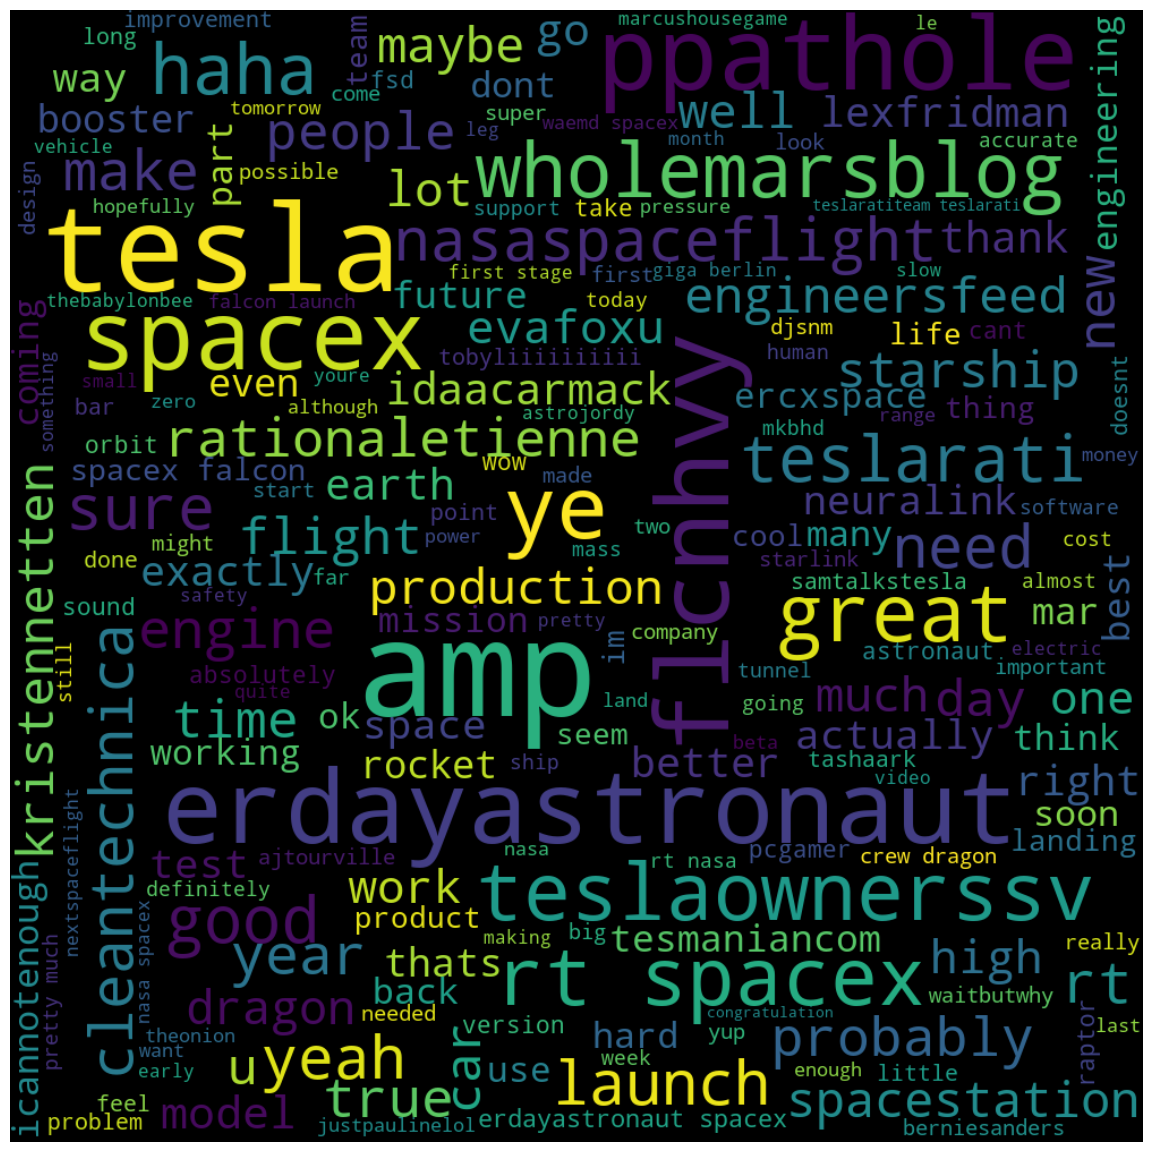

In [72]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in EM["Tweet"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(15, 15), dpi=100)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

# Add up The Negative, Neutral, Positive Analysis

In [74]:

def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
EM["analysis"] = EM["polarity"].apply(analysis)

EM.drop(['word_count','char_count','hastags','numerics'], axis=1)


,Tweet,sentiment,subjectivity,polarity,analysis
0,im alien,-0.250000,0.750000,-0.250000,Negative
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000,0.000000,Neutral
2,joerogan spotify great interview,0.800000,0.750000,0.800000,Positive
3,doge underestimated,0.000000,0.000000,0.000000,Neutral
4,teslacn congratulation tesla china amazing exe...,0.200000,0.322222,0.200000,Positive
...,...,...,...,...,...
1994,flcnhvy true sound surreal negative propaganda...,0.152381,0.492857,0.152381,Positive
1995,ppathole make sure read ur term amp condition ...,0.500000,0.888889,0.500000,Positive
1996,teslagong ppathole samwise gamgee,0.000000,0.000000,0.000000,Neutral
1997,ppathole dumb dumber,-0.375000,0.500000,-0.375000,Negative


In [75]:
positive_tweets = Tweets_EM[Tweets_EM['analysis'] == 'Positive']
negative_tweets = Tweets_EM[Tweets_EM['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Tweet'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Tweet'])

positive tweets
 -joerogan spotify great interview
 -teslacn congratulation tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely
negative tweets
 -im alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however
 -rationaletienne adamklotz spacex need pas deep chasm negative cash flow next year
 -sruhle everyone tesla receives stock comp stockoptions take table thats youre missing


# Plot the Sentiment analysis

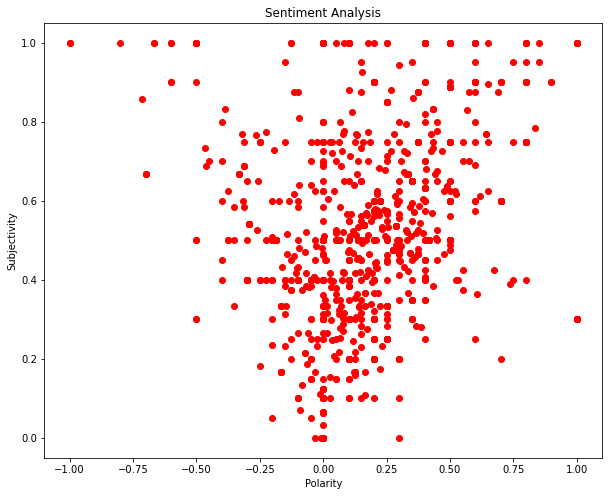

In [76]:
plt.figure(figsize=(10, 8))

for i in range(0, EM.shape[0]):
    plt.scatter(EM["polarity"][i], EM["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") 
plt.xlabel("Polarity")
plt.ylabel("Subjectivity") 
plt.show() 

In [77]:
len(positive_tweets)

845

In [78]:
len(negative_tweets)

198

In [79]:
len(positive_tweets) / len(negative_tweets)

4.267676767676767

# Conclusion -: 
The Positive Tweet ratio is high compare to negetive tweets of Elon Musk Twitter Data.Hence, it shows Elon Musk tweets in positive manner & his follower is also took his tweets positively.